In [1]:
import sys
sys.path.append('path/of/AI-Advanced-Course')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import sys

sys.path.append('/content/drive/MyDrive/Colab Notebooks/AI-Advanced-Course-master')

In [4]:
%matplotlib inline
import imp

from matplotlib import pyplot as plt

try:
    imp.find_module('jupyterplot')
    from jupyterplot import ProgressPlot
except ImportError:
    !pip install jupyterplot
    from jupyterplot import ProgressPlot

import torch
from torch import nn

import torchvision
from torchvision import datasets as D
from torchvision import transforms as T

from utils import invest_size
from utils import sample_random_data
from utils import show_images

     |████████████████████████████████| 71kB 8.1MB/s 
  Created wheel for lrcurve: filename=lrcurve-1.1.0-cp36-none-any.whl size=69144 sha256=41c7e5b3a7c32f444a91d7ba33a7fc3e8c7242486ea7b46e75f34c74ace0f600
  Stored in directory: /root/.cache/pip/wheels/75/a4/04/20e13c039859fa02094902e615d74fa46bfd6908906e31e278
Successfully built lrcurve


# Convolution layer

![](https://a.disquscdn.com/get?url=http%3A%2F%2Fi.imgur.com%2FOc1zZOM.png&key=LkQy1acZbmFHr9m1gWJUvA&w=800&h=387)

![](http://deeplearning.net/software/theano/_images/padding_strides.gif)

- 컨볼루션 레이어의 stride, padding을 변화시키며 출력 feature의 크기를 확인해보기

#### $N_{out}=\lfloor \frac{N_{in}+2\cdot padding-kernel~size}{stride} \rfloor+1$

##### ex) $stride~2$, $padding~1$, 컨볼루션 레이어에
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$24\times 24$ 크기의 입력이 들어가면
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$12\times 12$ 크기의 출력이 나옴
http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html

In [5]:
batch_size = 1
num_channels = 1
size_W = 24
size_H = 24

padding = 1
stride = 2
kernel_size = 3
out_channels = 1

'''
p = 3, ksize = 7, stride = 1
p = 2, ksize = 5, stride = 1
p = 1, ksize = 3, stride = 1 ***
p = 1, ksize = 3, stride = 2
'''

inputs = torch.randn(batch_size, num_channels, size_W, size_H)

convolution_layer = nn.Conv2d(
    in_channels=num_channels,
    out_channels=out_channels,
    kernel_size=kernel_size,
    stride=stride,
    padding=padding
)
invest_size(inputs, convolution_layer)

                             input shape                              
                      torch.Size([1, 1, 24, 24])                      
                                  |                                   
                                  V                                   
                                layer                                 
   Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))    
                                  |                                   
                                  V                                   
                             output shape                             
                      torch.Size([1, 1, 12, 12])                      


# Max Pooling Layer

In [6]:
'''
ksize = 2, stride = 2, padding = 0
ksize = 3, stride = 2, padding = 1
'''

maxpooling_layer = nn.MaxPool2d(
    kernel_size=kernel_size,
    stride=stride,
    padding=padding
)

invest_size(inputs, maxpooling_layer)

                             input shape                              
                      torch.Size([1, 1, 24, 24])                      
                                  |                                   
                                  V                                   
                                layer                                 
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                                  |                                   
                                  V                                   
                             output shape                             
                      torch.Size([1, 1, 12, 12])                      


# Convolution Neural Networks 만들기

In [17]:
class ConvolutionNeuralNetworks(nn.Module):
    def __init__(self):
        super().__init__()
        # 1, 1, 32, 32
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=16,
            kernel_size=3, stride=1, padding=1
        )
        # 1, 16, 32, 32
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 1, 16, 16, 16

        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        # 1, 32, 16, 16
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 1, 32, 8, 8

        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        # 1, 64, 8, 8
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 1, 64, 4, 4
        
        # 1, 64 * 4 * 4
        self.fc1 = nn.Linear(in_features=64 * 4 * 4, out_features=64)
        # 1, 64
        self.fc2 = nn.Linear(64, 10)
        # 1, 10
    
    def forward(self, x):
       
        x = self.conv1(x)
        
        x = self.relu1(x)
        x = self.maxpool1(x)
       
        
        x = self.conv2(x)
        
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        
        x = self.conv3(x)
        
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        
        x = x.flatten(start_dim=1)
        
       
        x = self.fc1(x)
        x = self.fc2(x)
       
        return x
cnn = ConvolutionNeuralNetworks()
print(cnn)

ConvolutionNeuralNetworks(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU(inplace=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU(inplace=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


# MNIST Dataset
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

### 데이터셋 생성

In [18]:
data_transform = T.Compose([T.Resize((32, 32)), T.ToTensor()])
mnist_dataset = {
    'train': D.MNIST(
        root='data',
        train=True,
        transform=data_transform,
        download=True
    ),
    'test': D.MNIST(
        root='data',
        train=False,
        transform=data_transform
    )
}
print(f'훈련 집합의 데이터 개수: {len(mnist_dataset["train"])}')
print(f'테스트 집합의 데이터 개수: {len(mnist_dataset["test"])}')

훈련 집합의 데이터 개수: 60000
테스트 집합의 데이터 개수: 10000


### 데이터 시각화

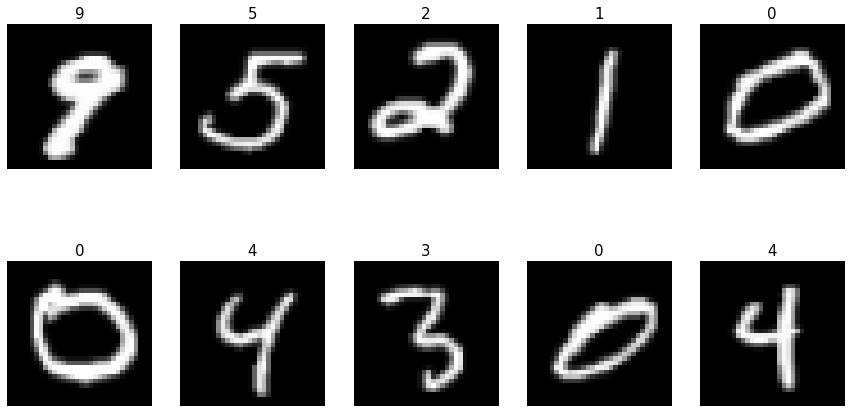

In [19]:
images, targets = sample_random_data(mnist_dataset['train'])
show_images(images, targets)

# 훈련시키기

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_epochs = 5
batch_size = 64
learning_rate = 0.005
momentum = 0.9

In [21]:
cnn = ConvolutionNeuralNetworks().to(device)
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate, momentum=momentum)
loss_function = torch.nn.CrossEntropyLoss()
data_loader = {
    'train': torch.utils.data.DataLoader(
        dataset=mnist_dataset['train'],
        batch_size=batch_size,
        shuffle=True,
    ),
    'test': torch.utils.data.DataLoader(
        dataset=mnist_dataset['test'],
        batch_size=batch_size,
        shuffle=False
    )
}

print(f'한 epoch 당 iteration 수: {len(mnist_dataset["train"])} / {batch_size} = {len(data_loader["train"])}')

loss_basket = []
accuracy_basket = []

pp = ProgressPlot(
    plot_names=['train', 'test'],
    line_names=['loss', 'accuracy'],
    x_lim=[0, num_epochs*len(data_loader['train'])],
    x_label='Iteration',
    y_lim=[[0, 2.5], [95, 100]]
)
accuracy = 0
for epoch in range(num_epochs):
    cnn.train()
    torch.set_grad_enabled(True)
    for iteration, (inputs, target) in enumerate(data_loader['train']):
        optimizer.zero_grad()
        inputs, target = inputs.to(device), target.to(device)
        
        output = cnn(inputs)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        
        loss_basket.append(loss.item())
        pp.update([[loss.item(), -1], [0, accuracy]])
    
    cnn.eval()
    corrects = 0
    torch.set_grad_enabled(False)
    for inputs, target in data_loader['test']:
        inputs, target = inputs.to(device), target.to(device)
        
        output = cnn(inputs)
        scores, predicted_classes = output.max(dim=1)
        
        corrects += (predicted_classes == target).sum().item()
        
    accuracy = corrects/len(mnist_dataset["test"])*100
    accuracy_basket.append(accuracy)
    print(f'Epoch: {epoch+1} accuracy {accuracy:.2f}')
pp.finalize()

한 epoch 당 iteration 수: 60000 / 64 = 938


Epoch: 1 accuracy 96.78
Epoch: 2 accuracy 97.62
Epoch: 3 accuracy 98.55
Epoch: 4 accuracy 98.56
Epoch: 5 accuracy 98.60


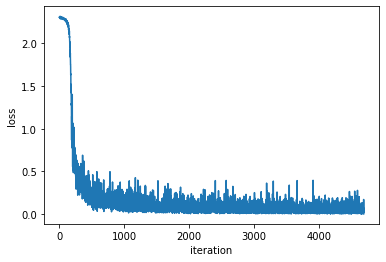

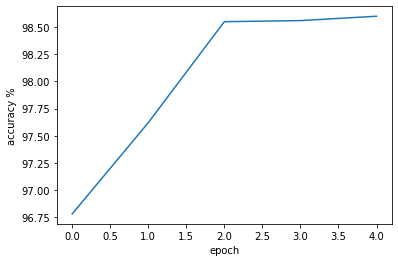

In [22]:
plt.plot(loss_basket)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

plt.plot(accuracy_basket)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.show()

# 훈련 시킨 모델 테스트
- 반복적으로 실행하여 틀린 샘플 찾아보기

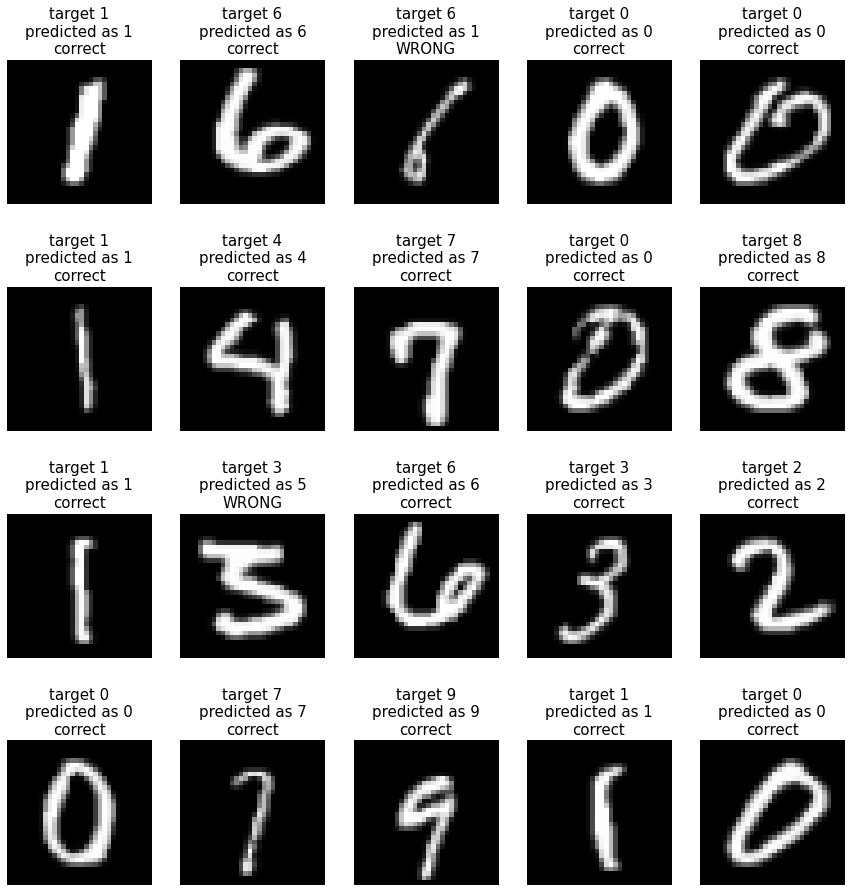

In [31]:
images, targets = sample_random_data(mnist_dataset['test'], num=20)

scores = cnn(images.to(device))
predicted = scores.argmax(1).detach().cpu()
correctness = (predicted == torch.as_tensor(targets))
titles = [f'target {t}\npredicted as {p}\n{"correct" if c else "WRONG"}'
          for t, p, c in zip(targets, predicted, correctness)]
show_images(images, titles)